# <h1 align="center">Student Evaluation for Thermonuclear Supernova Classification via their Multi-Wavelength Signatures</h1>

<h3 align="center">By Alexandros P. Pouroullis</h3>

<h2><ins>Step 1</ins></h2>
<font size="3">Identifying relationships between the 3 observable parameters</font>

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")

I'll first begin by parsing the contents of the text file. <br>
<p>
    For reference:<br>
    &nbsp; Observable Parameters: <br>
    &emsp;Column 1: $\tau$ (unitless) where $\tau$ is the initial optical depth (higher = more opaque medium)<br>
    &emsp;Column 2: Uncertainty in $\tau$<br>
    &emsp;Column 3: V<sub>max</sub> (s<sup>-1</sup>) where V<sub>max</sub> is the maximum expansion velocity of the ejecta<br>
    &emsp;Column 4: Uncertainty in V<sub>max</sub><br>
    &emsp;Column 5: $\Phi$<sub>300</sub> (photons.cm<sup>-2</sup>.s<sup>-1</sup>) where $\Phi$<sub>300</sub> is the emergent flux of gamma-rays at 300 days post-explosion within the energy band 2 to 4 MeV (10<sup>6</sup><br> &emsp;electronvolts) and at a supernova distance of 20 Mpc (10<sup>6</sup> parsecs).<br>
    &nbsp;Physical Parameters:<br>
    &emsp;Column 6: Total mass ($M_\odot$ – Solar Mass)<br>
    &emsp;Column 7: Mass <sup>56</sup>Ni ($M_\odot$)<br>
    &emsp;Column 8: Explosion energy (10<sup>51</sup> ergs, where 1 erg=10<sup>-7</sup>J)<br>
    &emsp;Column 9: Initial SNeIa mass distribution flag<br>
    &emsp;Column 10: Initial <sup>56</sup>Ni radial distribution flag<br>
</p>
    

In [4]:
df = pd.read_csv("datacube.txt", sep=' ', header=None, float_precision=None)
# Shuffling data. Setting the 'drop' parameter to True in reset_index() stops pandas from including the previous
# index as a new column in the shuffled dataframe. 
df = df.sample(frac=1).reset_index(drop=True)
df.columns = ['tau', 'tau_uncertainty', 'vmax', 'vmax_uncertainty', 'emergent_flux', 
                'total_mass', 'mass_nickel56', 'explosion_energy', 'initial_mass_distribution_flag', 
                'initial_nickel56_distribution_flag']
obs_params = ['tau', 'vmax', 'emergent_flux']
uncertainty_params = ['tau_uncertainty', 'vmax_uncertainty']
phys_params = ['total_mass', 'mass_nickel56', 'explosion_energy', 
                        'initial_mass_distribution_flag', 'initial_nickel56_distribution_flag']
# splitting the dataframe into two dataframes where one contains the observable and the 
# other the physical parameters.
obs_df = df[obs_params]
phys_df = df[phys_params]

# previewing the first 5 records of the dataframe containing the observable parameters
obs_df.head()

,tau,vmax,emergent_flux
0,2.836552,0.011721,0.000014
1,2.811437,0.013442,0.000003
2,2.699015,0.012906,0.000006
3,2.344703,0.013148,0.000006
4,2.721958,0.012360,0.000011


<h3>Univariate data analysis</h3>

In [1579]:
obs_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tau,512.0,2.576275,0.391005,1.661535,2.321794,2.559251,2.812090,3.621963
vmax,512.0,0.012814,0.000849,0.009842,0.012372,0.012891,0.013388,0.014723
emergent_flux,512.0,0.000007,0.000004,0.000003,0.000003,0.000006,0.000011,0.000015


Here, I create functions to create custom plots using matplotlib for plotting individual variables.

In [1581]:
def scatter_plot(x, y, ax, param):
    """Produces a custom labeled scatter plot using matplotlib"""
    ax.scatter(x, y, alpha=0.4)
    return ax

def histogram(x, ax, param, nbins):
    """Produces a custom labeled histogram using matplotlib"""
    ax.hist(x, bins=nbins)
    return ax

def violinplot(x, ax, param):
    """Produces a horizontal box and whisker diagram using matplotlib"""
    # setting vert to False produces a horizontal box and whisker diagram
    ax.violinplot(x, vert=False, showmedians=True)
    return ax

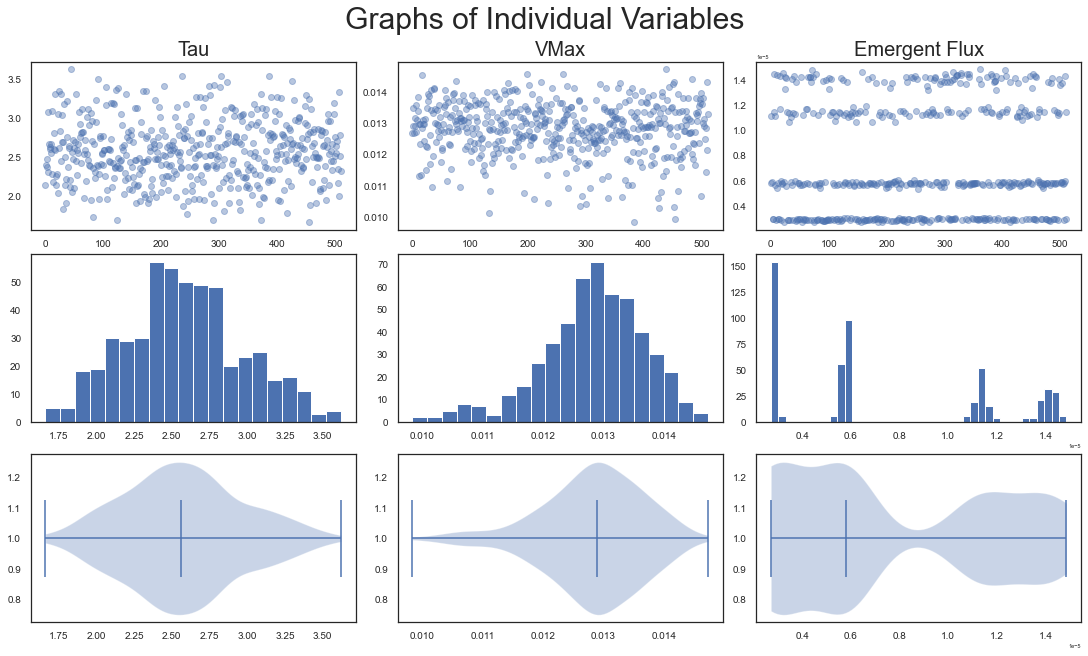

In [1582]:
fig, ax = plt.subplots(nrows=3, ncols=3,constrained_layout=True)
fig.set_size_inches(15, 9)
fig.suptitle("Graphs of Individual Variables", fontsize=30)

for axes in ax.flatten():
    axes.tick_params(axis='x', labelsize=10)
    axes.tick_params(axis='y', labelsize=10)

ax[0, 0].set_title("Tau", fontsize=20)

ax[0, 1].set_title("VMax", fontsize=20)

ax[0, 2].set_title("Emergent Flux", fontsize=20)

scatter_plot(obs_df.index, obs_df["tau"], ax[0, 0], "Tau")
scatter_plot(obs_df.index, obs_df["vmax"], ax[0, 1], "Vmax")
scatter_plot(obs_df.index, obs_df["emergent_flux"], ax[0, 2], "Emergent Flux")


histogram(obs_df["tau"], ax[1, 0], "Tau", 20)
histogram(obs_df["vmax"], ax[1, 1], "Vmax", 20)
histogram(obs_df["emergent_flux"], ax[1, 2], "Emergent Flux", 40)

violinplot(obs_df["tau"], ax[2, 0], "Tau")
violinplot(obs_df["vmax"], ax[2, 1], "Vmax")
violinplot(obs_df["emergent_flux"], ax[2, 2], "Emergent Flux");

Some important details immediately become evident. 
<br>
Tau seems to be quite randomly distributed, though there is some concentration in the range of 2.3 to 2.8, with the most prominent band being ~2.4. 
<br>
Vmax is more clearly concentrated at ~0.013.
<br>
Emergent flux appears to be the most interesting: it's clearly split into 4 narrow bands, 0.2, 0.6, 1.15 and 1.4 (all on the scale 1e-5).

<h3>Bivariate data analysis</h3>

In [1583]:
obs_df.corr()

,tau,vmax,emergent_flux
tau,1.000000,0.139121,0.632440
vmax,0.139121,1.000000,-0.256229
emergent_flux,0.632440,-0.256229,1.000000


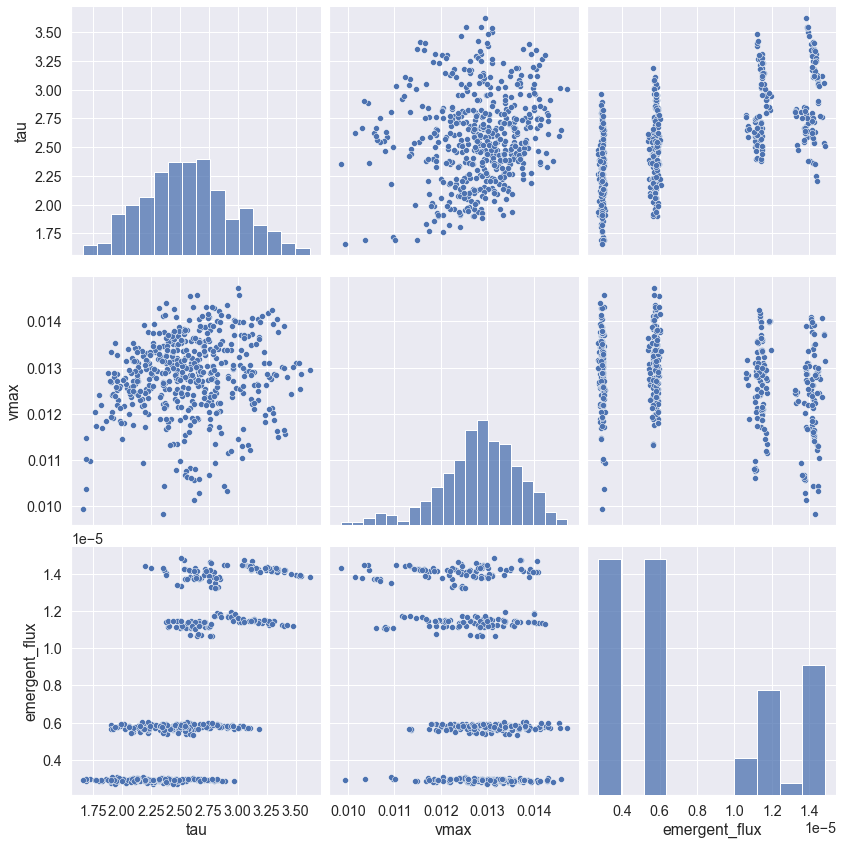

In [1594]:
sns.pairplot(obs_df, kind='scatter', height=4);
sns.set_context("notebook", font_scale=0.5) 
sns.set(font_scale=0.7)

There's minor positive correlation between tau and the emergent flux, but it doesn't seem to be anything particularly meaningful.
Otherwise, there seems to be no linear relationship between the observable parameters.

I can't seem to find any other links between the observable parameters, so I'll move on to step 2.

---

<h2><ins>Step 2</ins></h2>
<font size="3">Identifying relationships between the observable and physical parameters</font>

<h3>Physical parameter exploration</h3>

In [1595]:
phys_df.head()

,total_mass,mass_nickel56,explosion_energy,initial_mass_distribution_flag,initial_nickel56_distribution_flag
0,1.00,0.30,2.00,mwd,w7dt
1,1.40,0.60,2.00,hed8,w7dt
2,0.75,0.30,2.00,hed8,mwd
3,1.40,0.15,2.00,mwd,N100
4,1.80,0.15,0.75,N100,w7dt


From this preview of the data, it can be seen that the numerical data of the physical parameters are all likely discrete. I'll verify this by viewing the count of distinct values in each column.

In [252]:
for param in phys_params:
    print(phys_df[param].value_counts(), '\n')

2.00    128
1.80    128
1.40    128
1.00     64
0.75     64
Name: total_mass, dtype: int64 

0.15    160
0.30    160
0.60     96
0.75     96
Name: mass_nickel56, dtype: int64 

2.00    256
0.75    256
Name: explosion_energy, dtype: int64 

N100    128
w7dt    128
mwd     128
hed8    128
Name: initial_mass_distribution_flag, dtype: int64 

mwd     128
hed8    128
w7dt    128
N100    128
Name: initial_nickel56_distribution_flag, dtype: int64 



As expected, the data are indeed discrete.
<br>
The total mass, mass nickel-56, explosion energy, initial mass distribution flag and initial nickel-56 radial distribution flag are split into 4, 4, 2, 4, and 4 groups respectively. 
<br><br>
I'll now visualize the frequency that each of these groups occur for each variable using histograms.

In [1596]:
def frequency_histogram(param, fig, ax):
    ax.set_xlabel(param, fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    frequency_table = df[param].value_counts()
    # to make matplotlib treat the discrete numerical data as categorical data, 
    # I convert the indexes to strings.
    frequency_table_indexes = [str(index) for index in sorted(frequency_table.index)]
    frequency_table = (frequency_table_indexes, list(frequency_table.values))
    ax.tick_params(axis='both', which='major', labelsize=12)
    return ax.bar(frequency_table[0], frequency_table[1], color='steelblue', edgecolor='black', linewidth=0.3)

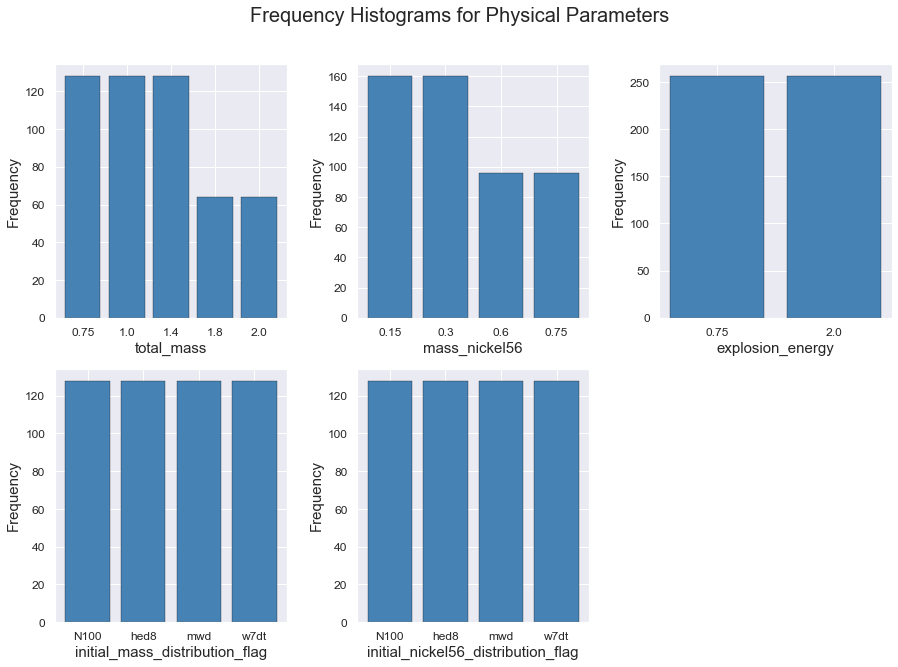

In [1598]:
fig = plt.figure(figsize=(15, 10))
title = fig.suptitle("Frequency Histograms for Physical Parameters", fontsize=20)
fig.subplots_adjust(wspace=0.3, hspace=0.2, top=0.90)

for plot_position, param in enumerate(phys_params, start=1):
    ax = fig.add_subplot(2, 3, plot_position)
    frequency_histogram(param, fig, ax)

The frequency histograms reveal that there is some imbalance in the representation of total mass of progenitor systems, with there being fewer systems containing a mass above 1.4$M_\odot$; there's also an imbalance in the representation of systems based on their mass <sup>56</sup>Ni – there are fewer samples whose mass <sup>56</sup>Ni is above 0.3$M_\odot$. Though the imabalance isn't large enough to really cause concern.

<h3>Observable and physical parameter relationships</h3>

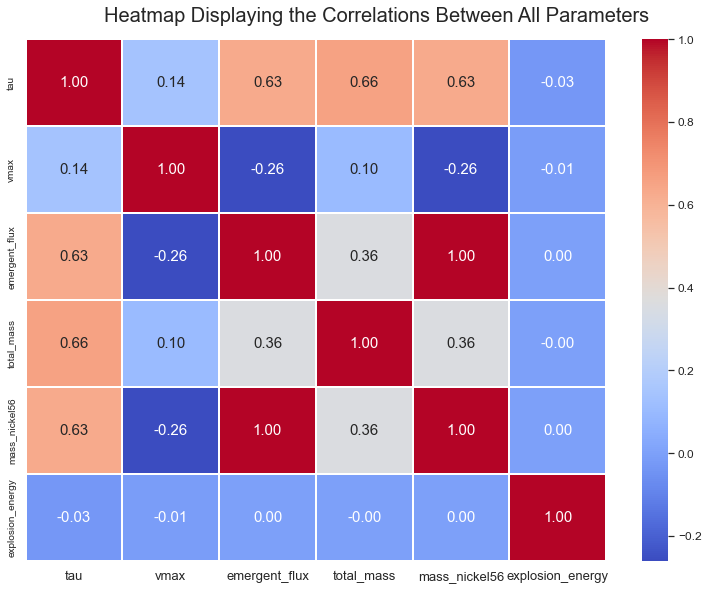

In [179]:
corr_table = df.loc[:, ~df.columns.isin(uncertainty_params)].corr()
fig, ax = plt.subplots(figsize=(13, 9))
fig.suptitle("Heatmap Displaying the Correlations Between All Parameters", fontsize=20)
fig.subplots_adjust(top=0.93)

cmap = sns.color_palette("coolwarm", as_cmap=True)
heat_map = sns.heatmap(round(corr_table, 2), annot=True, annot_kws={"fontsize": 15},
                       ax=ax, cmap=cmap, linewidths=0.05, fmt='.2f')
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=10)
cbar = heat_map.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)



There's a perfect correlation between emergent flux and mass <sup>56</sup>Ni as well as a moderate positive correlation between tau and the total mass of the progenitor system; the former is certainly worth exploring further.

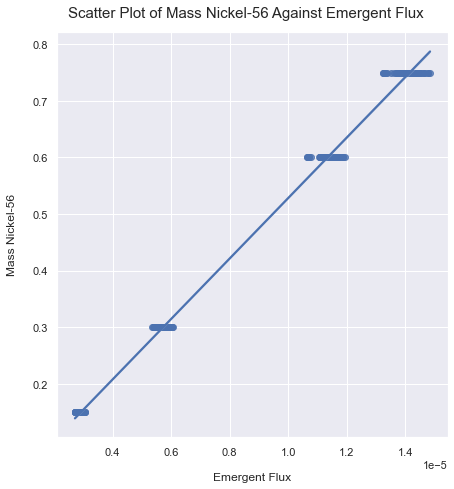

In [242]:
fig, ax = plt.subplots(figsize=(7, 7))
fig.suptitle("Scatter Plot of Mass Nickel-56 Against Emergent Flux", fontsize=15)
fig.subplots_adjust(top = 0.93)

regplot = sns.regplot(x=df["emergent_flux"], y=df["mass_nickel56"], ax=ax)
regplot.set_xlabel("Emergent Flux", fontsize=12)
regplot.xaxis.labelpad = 15
regplot.yaxis.labelpad = 15
regplot.set_ylabel("Mass Nickel-56", fontsize= 12);

As expected, we get a perfect positive linear relationship between emergent flux and mass <sup>56</sup>Ni. Not only that, but because emergent flux seems to generally occur in narrow bands, determining the mass <sup>56</sup>Ni given the emergent flux will be simple.

I'll now look for any other trends by colour coding scatter plots of the observable parameters with the physical parameters.

In [309]:
def colour_scatterplot(param, ax, hue_param):
    """Creates a colour-coded scatter plot where the first parameter is plotted while the second is used to colour the former."""
    ax = sns.scatterplot(x=df[param].index, y=df[param], hue=df[hue_param], ax=ax)
    ax.set_ylabel(param, fontsize=15)
    return ax

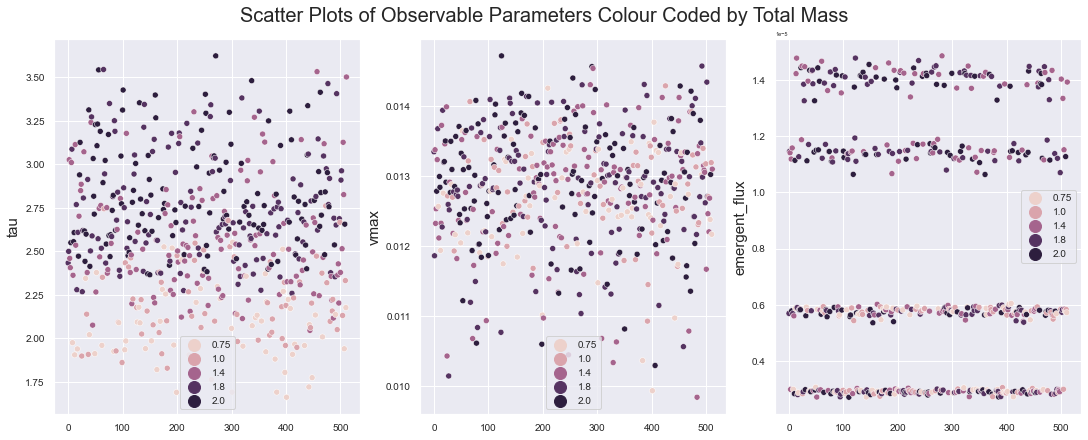

In [318]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Total Mass", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "total_mass")
    axes.legend(fontsize=10, markerscale=2)

It can be seen from the above visualizations that the total mass of the progenitor system can somewhat be delineated by different intervals of $\tau$, while the other observable parameters appear to have a random relationship to the total mass. Thus, it's likely that $\tau$ will be an important predictor of total mass. 

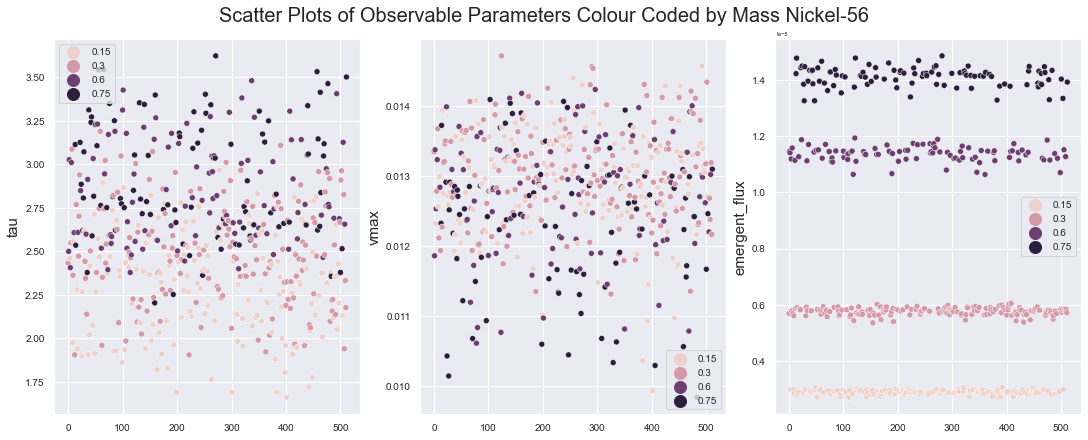

In [323]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Mass Nickel-56", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "mass_nickel56")
    axes.legend(fontsize=10, markerscale=2)

Once again, we see that emergent flux is the perfect predictor of mass <sup>56</sup>Ni.

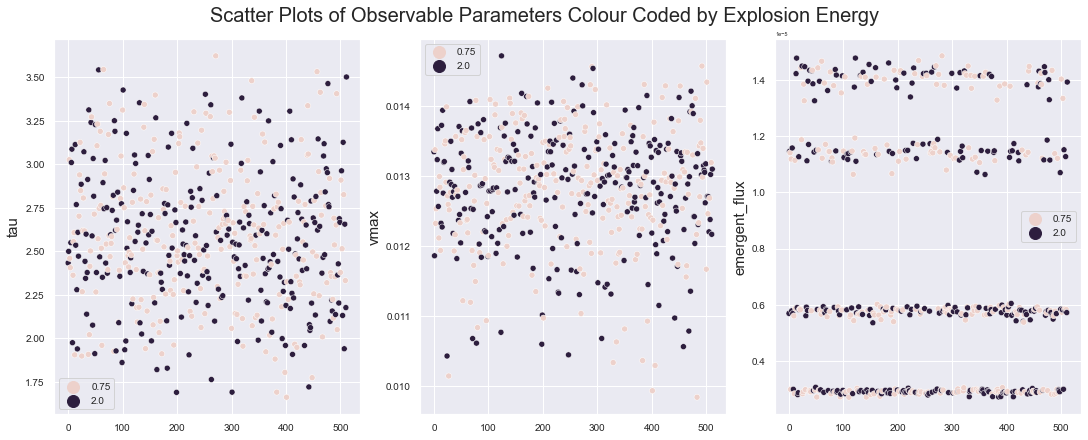

In [322]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Explosion Energy", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "explosion_energy")
    axes.legend(fontsize=10, markerscale=2)

I can't identify any relationships between the observable parameters and explosion energy. 

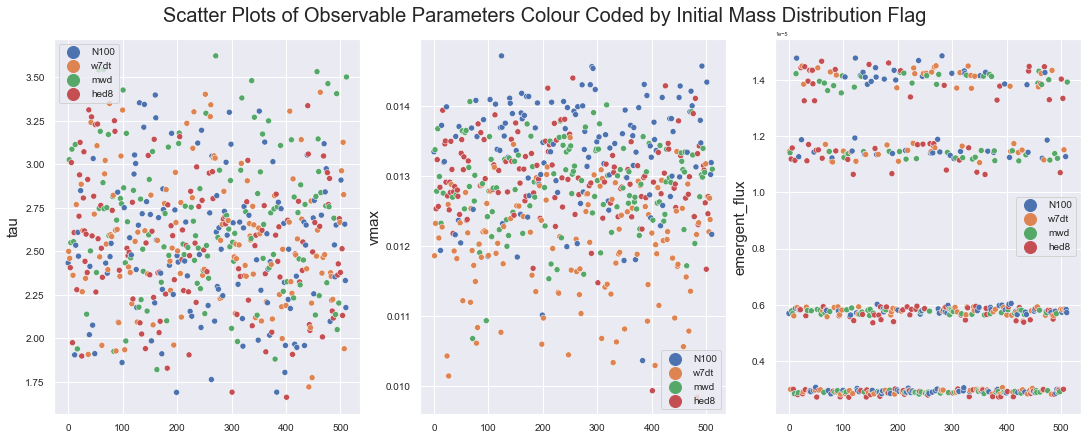

In [324]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Initial Mass Distribution Flag", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "initial_mass_distribution_flag")
    axes.legend(fontsize=10, markerscale=2)

The colour coded scatter plot V<sub>max</sub> reveals a vague relationship with the initial mass distribution flags. It seems that a flag of w7dt generally occurs at lower values of V<sub>max</sub>, then mwd in the next band of values, followed by hed8, and finally N100 in the highest band of values. 

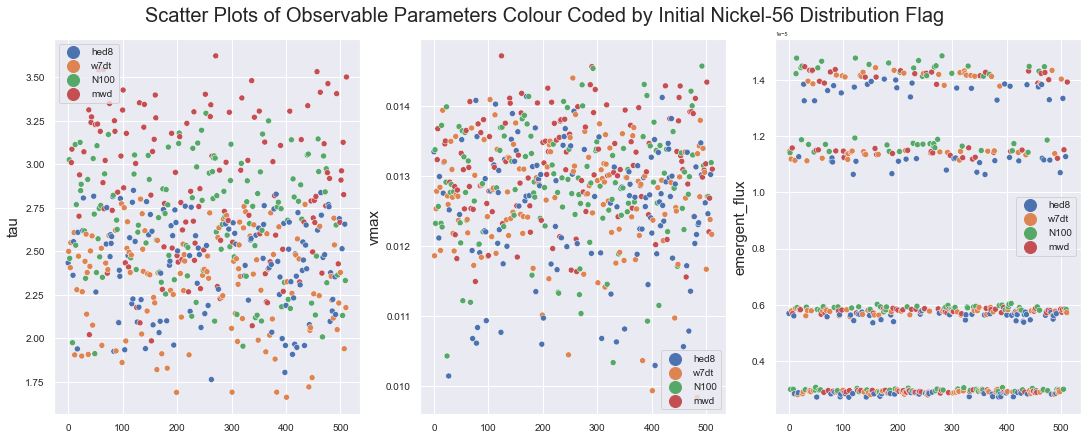

In [325]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Initial Nickel-56 Distribution Flag", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "initial_nickel56_distribution_flag")
    axes.legend(fontsize=10, markerscale=2)

Just as V<sub>max</sub> could somewhat be delineated by the initial mass distribution flags, so too can $\tau$ be delineated by initial <sup>56</sup>Ni radial distribution flags. 
<br>
The order, from smaller to larger values of $\tau$, that the initial <sup>56</sup>Ni distribution flags appear is w7dt, hed8, N100 and mwd respectively. Though there is substantial overlap amongst classes and many outliers.

That brings us to the end of the data exploration phase. Now, onto constructing the machine learning pipeline.

---

<h2><ins>Step 3</ins></h2>
<font size="3">Creating the Machine Learning Pipeline</font>

The problem at hand requires 5 outputs, and those 5 outputs are a combination of both categorical and numerical data. This makes creating a single model to determine all 5 outputs simultaneously rather complex. With my current capabilities, I can't quite conceive a model that can create a single output vector of all outputs simulatenously, so instead, I will create 5 separate models for each output, and aggregate the results to produce a single output vector. Since the dataset is small and the data consists of just numbers and strings, learning time is not a concern, and I can get away with training many models in a relatively short period of time. 

First, I'll experiment with different pipelines using various models which I think are appropriate for handling each subtask. Before that, though, I'll normalize the observable parameters to translate all the data into the range [0, 1]. This will preclude any one feature from being given too much influence on the model. This isn't really necessary for models like decision trees, where splits are made based on individual features, independent of others, thus not requiring inputs to be of the same scale. Nevertheless, this will be important for distance- and gradient-descent-based algorithms.

In [5]:
def normalize(param, method):
    """Normalizes a column of data in a pandas dataframe and stores it in a new column with the suffix '_normalized'
    The 'method' parameter determines the type of normalization to be performed on the data. It only accepts 2 strings:
    min_max or z_score."""
    if method == "min_max":
        df[param+'_normalized'] = (df[param]-df[param].min())/(df[param].max()-df[param].min())
    elif method == "z_score":
        df[param+'_normalized'] = (df[param]-df[param].mean())/(df[param].std())
        
def normalize_scalar(x, param, method):
    """normalizes a single value given the group of data it belongs to"""
    if method == "min_max": 
        return (x - df[param].min())/(df[param].max() - df[param].min())
    elif method == "z_score":
        return (x - df[param].mean())/(df[param].std())

def numerical_to_categorical(param):
    df[param+"_categorical"] = df[param].astype('str')

Above, I define some functions to help me out with pre-processing. 

In [6]:
# Converting the discrete numerical physical parameters' data into categorical data by converting them into 
# pandas objects. This will be used for experimentation later on, where I'll compare the results of regression
# models with the classification models.
numerical_to_categorical("total_mass")
numerical_to_categorical("mass_nickel56")
numerical_to_categorical("explosion_energy")
num_to_cat_data = ["total_mass_categorical", "mass_nickel56_categorical", "explosion_energy_categorical"]
df[num_to_cat_data].dtypes

total_mass_categorical          object
mass_nickel56_categorical       object
explosion_energy_categorical    object
dtype: object

These 3 columns of the dataframe are the numerical data of the physical parameters converted into categorical data – they are represented as pandas objects (the equivalent of strings) instead of floats, which will allow algorithms to treat them as classification problems as opposed to regression problems.

In [7]:
# normalizing the observable parameters and placing them in their own columns to preserve the original data
for param in obs_params:
    normalize(param, method="min_max")

normalized_obs_params = [param + "_normalized" for param in obs_params]

In [1603]:
df[normalized_obs_params].head()

,tau_normalized,vmax_normalized,emergent_flux_normalized
0,0.243368,0.585896,0.254233
1,0.376232,0.630472,0.694626
2,0.361745,0.748366,0.260422
3,0.415448,0.586230,0.020799
4,0.330788,0.684380,0.017192


The dataframe now has 3 additional columns containing the normalized observable data.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, train_test_split, cross_val_score, cross_validate, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [10]:
classification_scorer = {"acc": "accuracy"}
regression_scorer = {"r2": "r2",
                     "nmse": "neg_mean_absolute_error",
                     "nrmse": "neg_root_mean_squared_error"}

In the above cell, I store the classification scorer, namely accuracy, and the regression scorers: r<sup>2</sup> , mean absolute error (scikit-learn uses negative mean absolute error to make it a maximizing function) and root-mean-squared error (negative for the same reason as mean absolute error).

<h2>Regression Subtasks</h2>

In [11]:
# creating a dictionary of models to be compared for regression subtasks

models = {}
models['LR'] = LinearRegression()
models['DTR'] = DecisionTreeRegressor()
models['RFR'] = RandomForestRegressor()
models['KNR'] = KNeighborsRegressor()
# Support vector regressor
models['SVR'] = SVR()
models['GBR'] = GradientBoostingRegressor()
models['ABG'] = AdaBoostRegressor()
# Multilayer perceptron/artificial neural network. Max iterations are set to 500 to allow it to converge.
models['MLP'] = MLPRegressor(max_iter=500)

In [12]:
def compare_regression_models(X, y, scoring):
    """Compares the performance of a variety of regression models, printing out as well as plotting the scores.
    Parameters: 
        X - 2d array
        y - 1d array
        scoring - The scoring metric, as defined by the sklearn
    """
    model_results = {}
    for name, model in zip(models.keys(), models.values()):
        # k-fold cross-validation with 3 repeats. I use a split of 8 because it perfectly divides the 512 samples.
        # Setting the random state to an int ensures that output is reproducible across multiple function calls, 
        # thus allowing the model to compare models fairly. 
        cv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=1)
        cv_results = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        model_results[name] = cv_results
        results = "{name}: {mean} ({std})".format(name=name, mean=cv_results.mean(), std=cv_results.std())
        print(results)

    fig, ax = plt.subplots()
    fig.suptitle("Model Results Comparison", fontsize=20)
    ax.boxplot(model_results.values())
    ax.set_xticklabels(model_results.keys())
    ax.set_xlabel("Models", fontsize=15)
    ax.set_ylabel(scoring, fontsize=15)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10);

<h3>Predicting total mass</h3>

LR: 0.4225118898770923 (0.10321826785643663)
DTR: 0.399329418277435 (0.14555477113323495)
RFR: 0.6628490632827068 (0.0767462879479884)
KNR: 0.5069996237034479 (0.09436667206402125)
SVR: 0.5469699086037431 (0.08179828922383837)
GBR: 0.6406799772648551 (0.07634261159819802)
ABG: 0.5853818802410419 (0.06519833735242998)
MLP: 0.46667939063478786 (0.08655756733867698)


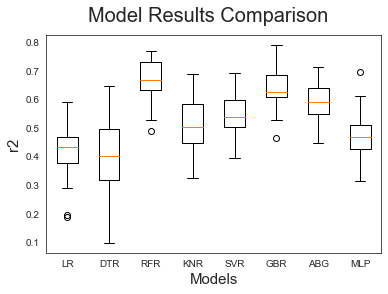

In [13]:
X = df[normalized_obs_params].values
y = df["total_mass"].values.ravel()
compare_regression_models(X, y, scoring='r2')

The best performing model seems to be the random forest regressor. I'll try enhance it further by tuning hyperparameters. First, I'll look at the parameters that can be adjusted, and select which ones are relevant.

In [14]:
rfr = RandomForestRegressor()
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
# number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# the maximum depth of the trees
max_depth = [int(x) for x in np.linspace(start=2, stop=20, num=10)]
max_depth.append(None)
# the minimum number of samples required before splitting the node
min_samples_split = [2, 5, 10]
# the minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# number of features considered at each split. If 'auto', all features are considered
max_features = ['auto', 'sqrt']
# method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators':n_estimators,
             'max_depth': max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'max_features':max_features,
             'bootstrap':bootstrap
             }
param_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}

Using RandomizedSearchCV, random combinations of the above parameters will be selected and the model will then be evaluated. The best parameters will then be saved.

In [16]:
rf = RandomForestRegressor()
# 100 different combinations of parameters are evaluated using cross-validation with 3 folds
rf_random = RandomizedSearchCV(estimator=rf, n_iter=100, param_distributions=param_grid, cv=4, verbose=1)
y = df[["total_mass"]].values.ravel()
rf_random.fit(X, y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=1)

In [17]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 14,
 'bootstrap': True}

In [19]:
cv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=1)
scoring = "neg_mean_absolute_error"

print("Evaluation of Tuned and Untuned RFR (lower = better)")
print('-'*50)

print("Untuned RFR")
untuned_rf = RandomForestRegressor(random_state=42)
untuned_rf.fit(X, y)
untuned_rf_score = cross_val_score(untuned_rf, X, y, scoring=scoring, cv=cv, error_score='raise')
print("Mean Absolute Error:", -untuned_rf_score.mean())

print('-'*50)

print("Tuned RFR")
tuned_rf = rf_random.best_estimator_
tuned_rf_score = cross_val_score(tuned_rf, X, y, scoring=scoring, cv=cv, error_score='raise')
print("Mean Absolute Error:", -tuned_rf_score.mean())

Evaluation of Tuned and Untuned RFR (lower = better)
--------------------------------------------------
Untuned RFR
Mean Absolute Error: 0.19223079427083323
--------------------------------------------------
Tuned RFR
Mean Absolute Error: 0.1934427717141297


The tuned model in fact performed worse. In the final pipeline, I'll likely use the default model. 

<h3>Predicting mass <sup>56</sup>Ni</h3>

As was seen in the data visualizations in step 2, determining mass <sup>56</sup>Ni is a very simple task. What's essential when training the model though is that only emergent flux is fed as input, because emergent flux is the perfect determinant of mass <sup>56</sup>Ni. 

LR: 0.9976195573762894 (0.0008044614646883033)
DTR: 1.0 (0.0)
RFR: 1.0 (0.0)
KNR: 1.0 (0.0)
SVR: 0.9026576509898776 (0.00753930609755744)
GBR: 0.9999999992822755 (1.5986881712949982e-11)
ABG: 1.0 (0.0)
MLP: 0.9941276136541363 (0.0038911370433398866)


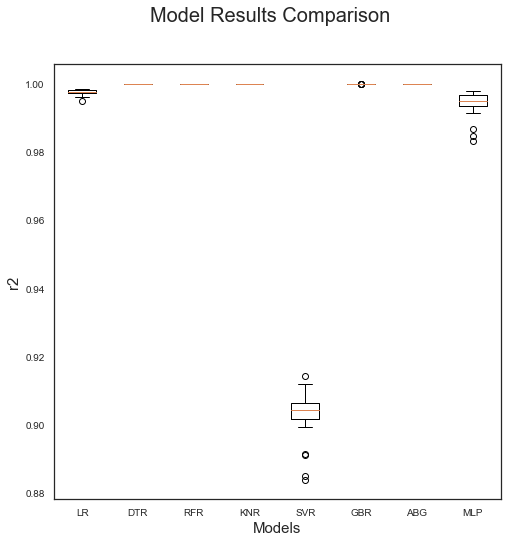

In [1290]:
compare_regression_models(inputs=["emergent_flux_normalized"], output="mass_nickel56", scoring='r2')

I can achieve perfect accuracy with a variety of models, but for consistency, I'll stick to the random forest for the final pipeline. 

<h3>Predicting explosion energy</h3>

LR: -0.6287842724141158 (0.004844921465984778)
DTR: -0.7242838541666666 (0.066929964827318)
RFR: -0.7099934895833333 (0.026016956049637302)
KNR: -0.6793619791666666 (0.03157216477010088)
SVR: -0.7226468408163673 (0.0314371247564399)
GBR: -0.6487505698667486 (0.02350939399508294)
ABG: -0.6370020736001013 (0.018034828168168055)
MLP: -0.6299557100305674 (0.006528540813463695)


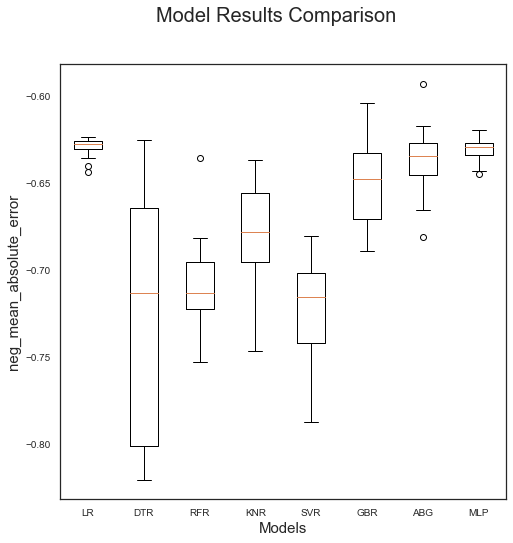

In [1410]:
X = df[normalized_obs_params].values
y = df["explosion_energy"].values.ravel()
compare_regression_models(X, y, scoring="neg_mean_absolute_error")

I can't seem to find a model that yields a meaningful prediction of the explosion energy. The mean absolute error for all the models is roughly around 0.65, which is unacceptably large considering the range of the explosion energy (0.75-2). 

Just out of curiosity, I'll convert the numerical physical parameters into categorical data since they're all discrete values and these discrete values can be split into several groups. I'll then use classification models to classify the numerical classes in hopes that I can perhaps achieve better predictions. This wouldn't quite be practical in reality, where the physical characteristics of progenitor systems would almost certainly not appear in discrete values like they do in the data cube.

<h2>Converting the Regression Subtasks into Multi-Class Classification Problems</h2>

In [20]:
# creating a dictionary of models to be compared for classification subtasks

classification_models = {}
classification_models['KNC'] = KNeighborsClassifier()
classification_models['GBC'] = GradientBoostingClassifier()
classification_models['ABC'] = AdaBoostClassifier()
classification_models['RFC'] = RandomForestClassifier()
classification_models['DTC'] = DecisionTreeClassifier()
# Support Vector Machine Classifier
classification_models['SVC'] = SVC()
# Multilayer Perceptron/Artificial Neural Network Classifier
classification_models['MLP'] = MLPClassifier(max_iter=2000)
# Gaussian Naive Bayes: distribution of features is assumed to be gaussian.
classification_models['GNB'] = GaussianNB()

In [21]:
def compare_classification_models(X, y, scoring):
    """Compares the performance of a variety of classification models, printing out as well
        as plotting the scores.
    Parameters: 
        X - 2d array
        y - 1d array
        scoring - The scoring metric, as defined by the sklearn
    """
    model_results = {}
    for name, model in zip(classification_models.keys(), classification_models.values()):
        # k-fold cross-validation with 3 repeats. I use 8 folds because it perfectly divides the 512 samples.
        # Setting the random state to an int ensures that output is reproducible across multiple function calls, 
        # thus allowing the model to compare models fairly. 
        cv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=1)
        cv_results = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        model_results[name] = cv_results
        results = "{name}: {mean} ({std})".format(name=name, mean=cv_results.mean(), std=cv_results.std())
        print(results)

    fig, ax = plt.subplots()
    fig.suptitle("Model Results Comparison", fontsize=20)
    ax.boxplot(model_results.values())
    ax.set_xticklabels(model_results.keys())
    ax.set_xlabel("Models", fontsize=15)
    ax.set_ylabel(scoring.capitalize(), fontsize=15)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10);

<h3>Treating the discrete total mass data as categorical data</h3>

KNC: 0.2981770833333333 (0.05965474577580889)
GBC: 0.3802083333333333 (0.0709844435960365)
ABC: 0.3001302083333333 (0.06457795151467409)
RFC: 0.4244791666666667 (0.05195296183140626)
DTC: 0.4322916666666667 (0.06760809888409984)
SVC: 0.3059895833333333 (0.049187048873760686)
MLP: 0.365234375 (0.05333378473726613)
GNB: 0.326171875 (0.06510091137694905)


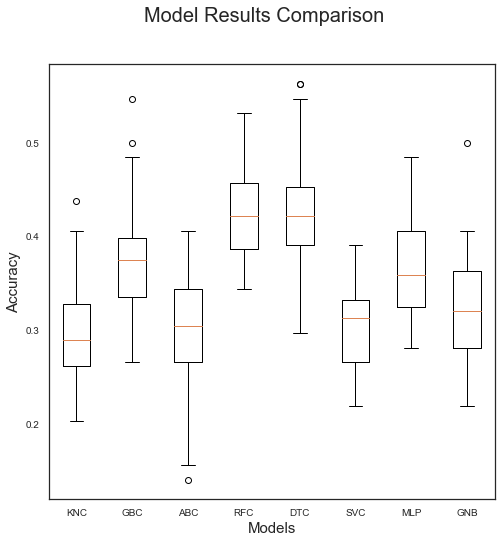

In [1433]:
X = df[normalized_obs_params].values
y = df[["total_mass_categorical"]].values.ravel()
compare_classification_models(X, y, scoring='accuracy')

<h3>Treating the discrete mass <sup>56</sup>Ni data as categorical data</h3>

KNC: 1.0 (0.0)
GBC: 1.0 (0.0)
ABC: 0.8125 (0.039322054350368486)
RFC: 0.9993489583333334 (0.003122286147990052)
DTC: 1.0 (0.0)
SVC: 1.0 (0.0)
MLP: 1.0 (0.0)
GNB: 1.0 (0.0)


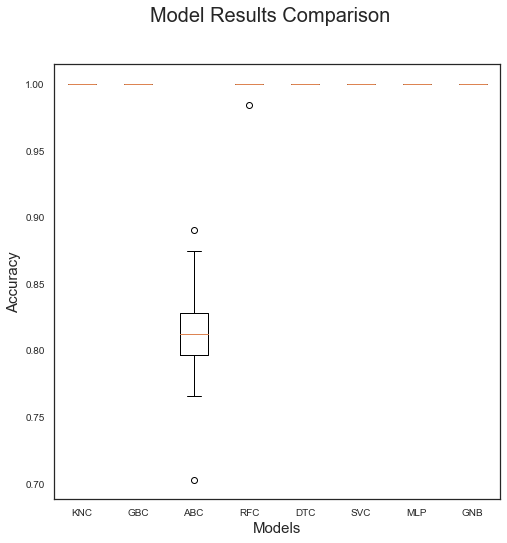

In [1435]:
X = df[normalized_obs_params].values
y = df[["mass_nickel56_categorical"]].values.ravel()
compare_classification_models(X, y, scoring='accuracy')

<h3>Treating the discrete explosion energy data as categorical data</h3>

KNC: 0.3951822916666667 (0.0585467114430002)
GBC: 0.43359375 (0.06477782793662891)
ABC: 0.4407552083333333 (0.05336556414407076)
RFC: 0.328125 (0.04665748142491905)
DTC: 0.4075520833333333 (0.056860951981505335)
SVC: 0.384765625 (0.04054792869536464)
MLP: 0.4401041666666667 (0.04434736032793334)
GNB: 0.4720052083333333 (0.05897948839213735)


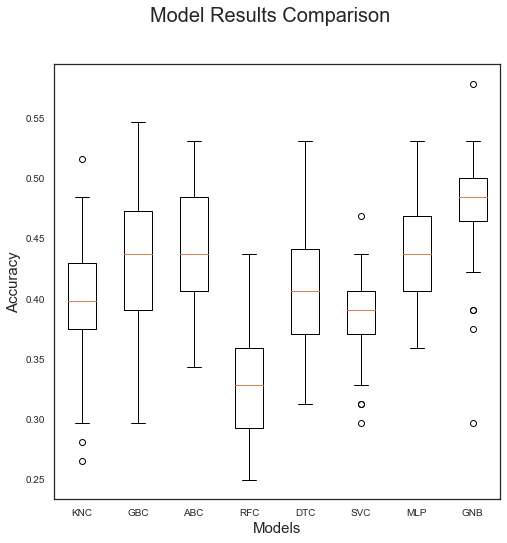

In [1437]:
X = df[normalized_obs_params].values
y = df[["explosion_energy_categorical"]].values.ravel()
compare_classification_models(X, y, scoring="accuracy")

The results are lousy and show no improvement whatsoever from the regression models'. 

<h2>Classification Subtasks</h2>

<h3>Predicting the Initial Mass Distribution Flag</h3>

KNC: 0.5364583333333334 (0.05175678883945779)
GBC: 0.6536458333333334 (0.06325498854943291)
ABC: 0.474609375 (0.07284396952723249)
RFC: 0.67578125 (0.06055737476163273)
DTC: 0.6295572916666666 (0.05749475722437595)
SVC: 0.5390625 (0.07452650011069888)
MLP: 0.5598958333333334 (0.06179067977971183)
GNB: 0.46875 (0.05201818842562026)


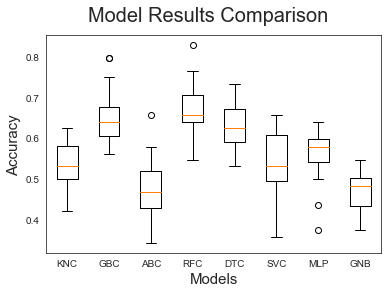

In [22]:
X = df[normalized_obs_params].values
y = df[["initial_mass_distribution_flag"]].values.ravel()
compare_classification_models(X, y, scoring='accuracy')

Once again, the random forest performs best. I'll try tune the hyperparameters using RandomizedSearchCV to see if I can get improved results.

In [23]:
# number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# the maximum depth of the trees
max_depth = [int(x) for x in np.linspace(start=2, stop=20, num=10)]
max_depth.append(None)
# the minimum number of samples required before splitting the node
min_samples_split = [2, 5, 10]
# the minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# number of features considered at each split. If 'auto', all features are considered
max_features = ['auto', 'sqrt']
# method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators':n_estimators,
             'max_depth': max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'max_features':max_features,
             'bootstrap':bootstrap
             }
param_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}

In [24]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, n_iter=100, param_distributions=param_grid, cv=3, verbose=1)
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=1)

In [25]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [30]:
cv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=1)

print("Comparison of scores of untuned random forest and tuned random forest")
print('-'*50)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Untuned Random Forest")
untuned_rf = RandomForestClassifier(random_state=42)
untuned_rf.fit(x_train, y_train)
y_pred = untuned_rf.predict(x_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

print('-'*50)

print("Tuned Random Forest")
tuned_rf = rf_random.best_estimator_
tuned_rf.fit(x_train, y_train)
y_pred = tuned_rf.predict(x_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

Comparison of scores of untuned random forest and tuned random forest
--------------------------------------------------
Untuned Random Forest
              precision    recall  f1-score   support

        N100       0.74      0.83      0.78        41
        hed8       0.83      0.63      0.72        46
         mwd       0.59      0.58      0.59        38
        w7dt       0.69      0.80      0.74        44

    accuracy                           0.71       169
   macro avg       0.71      0.71      0.71       169
weighted avg       0.72      0.71      0.71       169

--------------------------------------------------
Tuned Random Forest
              precision    recall  f1-score   support

        N100       0.71      0.83      0.76        41
        hed8       0.87      0.59      0.70        46
         mwd       0.64      0.61      0.62        38
        w7dt       0.69      0.84      0.76        44

    accuracy                           0.72       169
   macro avg       0.73  

The results are rather disappointing: the tuned random forest classifier had a trivial improvement in performance relative to the base model.

<h3>Predicting the Initial <sup>56</sup>Ni Radial Distribution Flag</h3>

KNC: 0.5065104166666666 (0.054857745919116914)
GBC: 0.7395833333333334 (0.05292292039818118)
ABC: 0.5436197916666666 (0.0662880637426397)
RFC: 0.7233072916666666 (0.04476118603161222)
DTC: 0.6881510416666666 (0.0488888511272246)
SVC: 0.515625 (0.06051536478449089)
MLP: 0.5091145833333334 (0.061831823284290446)
GNB: 0.4069010416666667 (0.0350777963360005)


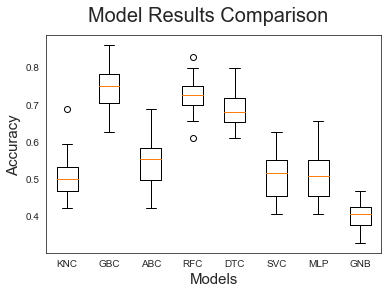

In [31]:
X = df[normalized_obs_params].values
y = df[['initial_nickel56_distribution_flag']].values.ravel()
compare_classification_models(X, y, scoring='accuracy')

In [33]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [34]:
learning_rate = [0.01, 0.1, 0.2, 0.3, 1]
# number of trees in the random forest. According to sklearn, gradient boosting is somewhat resistant to 
# over-fitting, so a higher number typically yields a better accuracy.
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# the fraction of samples to be used for fitting the base learners.
subsample = [0.5, 0.8, 1]
# the maximum depth of the trees
max_depth = [int(x) for x in np.linspace(start=2, stop=20, num=10)]
max_depth.append(None)
# the minimum number of samples required before splitting the node
min_samples_split = [2, 5, 10]
# the minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# number of features considered at each split. If 'auto', sqrt(n_features) are considered.
max_features = [None, 'auto']


param_grid = {'n_estimators':n_estimators,
             'max_depth': max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'max_features':max_features
             }
param_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': [None, 'auto']}

In [36]:
gbc = GradientBoostingClassifier()
random_gbc = RandomizedSearchCV(estimator=gbc, n_iter=100, param_distributions=param_grid, cv=4, verbose=1)
random_gbc.fit(X, y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, None],
                                        'max_features': [None, 'auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=1)

In [37]:
random_gbc.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 14}

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print("Evaluation of Tuned and Untuned GBC")

print('-'*50)

print("Untuned GBC")
base_gbc = GradientBoostingClassifier()
base_gbc.fit(x_train, y_train)
y_pred = base_gbc.predict(x_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

print('-'*50)

print("Tuned GBC")
best_gbc = random_gbc.best_estimator_
best_gbc.fit(x_train, y_train)
y_pred = best_gbc.predict(x_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

Evaluation of Tuned and Untuned GBC
--------------------------------------------------
Untuned GBC
              precision    recall  f1-score   support

        N100       0.63      0.65      0.64        37
        hed8       0.89      0.80      0.85        41
         mwd       0.65      0.61      0.63        46
        w7dt       0.71      0.80      0.75        45

    accuracy                           0.72       169
   macro avg       0.72      0.72      0.72       169
weighted avg       0.72      0.72      0.72       169

--------------------------------------------------
Tuned GBC
              precision    recall  f1-score   support

        N100       0.65      0.65      0.65        37
        hed8       0.87      0.83      0.85        41
         mwd       0.67      0.65      0.66        46
        w7dt       0.71      0.76      0.73        45

    accuracy                           0.72       169
   macro avg       0.72      0.72      0.72       169
weighted avg       0.72  

Once again, hyperparameter tuning didn't have a particularly noticeable impact on accuracy.

<h2>Developing the final pipeline</h2>

The aim in this final stretch is to aggregate the results of the best models for each subtask and output a single vector containing the 5 predicted physical parameters given the 3 obersvable parameters.

In [39]:
class Pipeline:
    def __init__(self):
        self.cv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=42)
        self.regression_metrics = {'nmae': 'neg_mean_absolute_error',
                          'nrmse': 'neg_root_mean_squared_error',
                          'r2': 'r2'}
        self.classification_metrics = {'acc': 'accuracy'}
        self.X = df[normalized_obs_params].values
        self.scores = {}
        self.total_mass_model = None
        self.mass_nickel56_model = None
        self.explosion_energy_model = None
        self.initial_mass_distribution_flag_model = None
        self.initial_nickel56_distribution_flag_model = None

    
    def normalize_data(self, tau, vmax, emergent_flux, method):
        """Produces a 2d numpy array containing the test data to be used for final predictions"""
        tau_test = normalize_scalar(tau, 'tau', method)
        vmax_test = normalize_scalar(vmax, 'vmax', method)
        emergent_flux_test = normalize_scalar(emergent_flux, 'emergent_flux', method)
        return {'tau_test':tau_test, 'vmax_test':vmax_test, 'emergent_flux_test':emergent_flux_test}
    
    def init_total_mass_model(self):
        # The model uses the default random forest regressor, because no improvement was observed
        # in the tuned model. 
        rf = RandomForestRegressor()
        y = df[["total_mass"]].values.ravel()
        # total_mass_score is a dictionary that stores metrics as keys and the list of scores from the cross
        # validation as values. The keys for the metrics are 'test'+regression_metric. 
        # So, for example, to access the list of scores of the negative mean absolute error, you'd use
        # total_mass_score["test_nmae"].
        total_mass_score = cross_validate(rf, self.X, y, cv=self.cv, scoring=self.regression_metrics)
        nmae = {"nmae_mean":total_mass_score["test_nmae"].mean(), "nmae_std" :total_mass_score["test_nmae"].std()}
        nrmse = {"nrmse_mean":total_mass_score["test_nrmse"].mean(), "nrmse_std":total_mass_score["test_nrmse"].std()}
        r2 = {"r2_mean":total_mass_score["test_r2"].mean(), "r2_std":total_mass_score["test_r2"].std()}
        self.scores["total_mass"] = {"nmae": nmae, "nrmse": nrmse, "r2":r2}
        rf.fit(self.X, y)
        print("Successfully initialized total mass model")
        return rf
    
    def init_mass_nickel56_model(self):
        rf = RandomForestRegressor()
        y = df[["mass_nickel56"]].values.ravel()
        X = df[["emergent_flux_normalized"]].values
        
        mass_nickel56_score = cross_validate(rf, X, y, cv=self.cv, scoring=self.regression_metrics)
        nmae = {"nmae_mean":mass_nickel56_score["test_nmae"].mean(), "nmae_std" :mass_nickel56_score["test_nmae"].std()}
        nrmse = {"nrmse_mean":mass_nickel56_score["test_nrmse"].mean(), "nrmse_std":mass_nickel56_score["test_nrmse"].std()}
        r2 = {"r2_mean":mass_nickel56_score["test_r2"].mean(), "r2_std":mass_nickel56_score["test_r2"].std()}
        self.scores["mass_nickel56"] = {"nmae": nmae, "nrmse": nrmse, "r2":r2}
        
        rf.fit(X, y)
        print("Successfully initialized mass nickel-56 model")
        return rf
        
    
    def init_explosion_energy_model(self):
        lr = LinearRegression()
        y = df[["explosion_energy"]].values.ravel()
        
        explosion_energy_score = cross_validate(lr, self.X, y, cv=self.cv, scoring=self.regression_metrics)
        nmae = {"nmae_mean":explosion_energy_score["test_nmae"].mean(), "nmae_std" :explosion_energy_score["test_nmae"].std()}
        nrmse = {"nrmse_mean":explosion_energy_score["test_nrmse"].mean(), "nrmse_std":explosion_energy_score["test_nrmse"].std()}
        r2 = {"r2_mean":explosion_energy_score["test_r2"].mean(), "r2_std":explosion_energy_score["test_r2"].std()}
        self.scores["explosion_energy"] = {"nmae": nmae, "nrmse": nrmse, "r2":r2}
        
        lr.fit(self.X, y)
        print("Successfully initialized explosion energy model")
        return lr
    
    def init_initial_mass_distribution_flag_model(self):
        # The parameters are derived from the most optimal model obtained from the randomized
        # search from earlier.
        rf = RandomForestClassifier(n_estimators=900, 
                                    max_features='sqrt', 
                                    max_depth=None, 
                                    bootstrap=True)
        y = df[["initial_mass_distribution_flag"]].values.ravel()
        
        init_mass_dist_flag_score = cross_validate(rf, self.X, y, cv=self.cv, scoring=self.classification_metrics)
        acc = {"acc_mean":init_mass_dist_flag_score['test_acc'].mean(), "acc_std":init_mass_dist_flag_score['test_acc'].std()}
        self.scores["initial_mass_distribution_flag"] = {'acc': acc}
        
        rf.fit(self.X, y)
        print("Successfully initialized initial mass distribution model")
        return rf
    
    def init_initial_nickel56_distribution_flag_model(self):
        # Hyperparameters are adapted from the best set of features I could find after multiple 
        # randomized searches. 
        gbc = GradientBoostingClassifier(n_estimators=400,
                                         min_samples_split=10,
                                         min_samples_leaf=4,
                                         max_features='auto',
                                         max_depth=8)
        y = df[["initial_nickel56_distribution_flag"]].values.ravel()
        
        init_nickel56_dist_flag_score = cross_validate(gbc, self.X, y, cv=self.cv, scoring=self.classification_metrics)
        acc = {"acc_mean": init_nickel56_dist_flag_score['test_acc'].mean(), "acc_std": init_nickel56_dist_flag_score['test_acc'].std()}
        self.scores["initial_nickel56_distribution_flag"]  = {'acc': acc}
        
        gbc.fit(self.X, y)
        print("Successfully initialized initial nickel-56 radial distribution flag")
        return gbc
    
    def evaluate_full_model(self):
        """prints a full report of all the models"""
        for i in range(len(phys_params)):
            print(self.model_evaluation(phys_params[i]))
            # only print a separator if it's not the last model evaluation
            if i != len(phys_params)-1:
                print('-'*50)
    
    def model_evaluation(self, param):
        """returns an evaluation of one parameter's model"""
        evaluation = ''
        evaluation += "Evaluation of model for " + param +'\n\n'
        for metric in self.scores[param].keys():
            evaluation  += metric + '\n'
            for summary, quantity in zip(self.scores[param][metric].keys(), self.scores[param][metric].values()):
                # summary is mean or standard deviation
                evaluation += '\t' + summary + ': ' + str(quantity) + '\n'
        return evaluation
        
    def init_models(self):
        self.total_mass_model = self.init_total_mass_model()
        self.mass_nickel56_model = self.init_mass_nickel56_model()
        self.explosion_energy_model = self.init_explosion_energy_model()
        self.initial_mass_distribution_flag_model = self.init_initial_mass_distribution_flag_model()
        self.initial_nickel56_distribution_flag_model = self.init_initial_nickel56_distribution_flag_model()
        
        print("Initialization complete")
        
    def make_prediction(self, test_inputs):
        """returns a dictionary where the key is the name of the physical parameter and the value is the output"""
        # The first step is to normalize the test data entered, since the models were trained on normalized 
        # data. test_data stores a dictionary where the keys are obs_param+'_test' and the values are the 
        # normalized data for the corresponding parameter. normalize_data returns a 2d list
        test_data = self.normalize_data(test_inputs[0], test_inputs[1], test_inputs[2], method='min_max')
        all_obs_params = np.array([test_data["tau_test"], test_data["vmax_test"], test_data["emergent_flux_test"]]).reshape(1, -1)
        # isolating emergent flux so it can be fed into the mass nickel-56 model alone.
        emergent_flux_test = np.array([test_data['emergent_flux_test']]).reshape(1, -1)

        # storing the predictions
        predicted_values = {}
        predicted_values["total_mass"] = self.total_mass_model.predict(all_obs_params)
        predicted_values["mass_nickel56"] = self.mass_nickel56_model.predict(emergent_flux_test)
        predicted_values["explosion_energy"] = self.explosion_energy_model.predict(all_obs_params)
        predicted_values["initial_mass_distribution_flag"] = self.initial_mass_distribution_flag_model.predict(all_obs_params)
        predicted_values["initial_nickel56_distribution_flag"] = self.initial_nickel56_distribution_flag_model.predict(all_obs_params)
        
        return predicted_values

In [40]:
test1 = [3.35, 0.015, 1.2e-5]
test2 = [2.54, 0.013, 5.02e-6]
test3 = [2.46, 0.013, 1.03e-5]

In [41]:
pipeline = Pipeline()
pipeline.init_models()

Successfully initialized total mass model
Successfully initialized mass nickel-56 model
Successfully initialized explosion energy model
Successfully initialized initial mass distribution model
Successfully initialized initial nickel-56 radial distribution flag
Initialization complete


In [42]:
pipeline.evaluate_full_model()

Evaluation of model for total_mass

nmae
	nmae_mean: -0.19263118489583322
	nmae_std: 0.014991389703233136
nrmse
	nrmse_mean: -0.24677133696399065
	nrmse_std: 0.02223345139823073
r2
	r2_mean: 0.6680248501854148
	r2_std: 0.05886879038531753

--------------------------------------------------
Evaluation of model for mass_nickel56

nmae
	nmae_mean: -4.368431253306178e-16
	nmae_std: 3.440219318253833e-17
nrmse
	nrmse_mean: -5.685712005256569e-16
	nrmse_std: 4.020729744095847e-17
r2
	r2_mean: 1.0
	r2_std: 0.0

--------------------------------------------------
Evaluation of model for explosion_energy

nmae
	nmae_mean: -0.628332354766569
	nmae_std: 0.004563564948500822
nrmse
	nrmse_mean: -0.62932524043329
	nrmse_std: 0.0050875140495340665
r2
	r2_mean: -0.026883671888737703
	r2_std: 0.02618296329558182

--------------------------------------------------
Evaluation of model for initial_mass_distribution_flag

acc
	acc_mean: 0.6848958333333334
	acc_std: 0.05036218647347322

---------------------

In [43]:
pipeline.make_prediction(test1)

{'total_mass': array([1.892]),
 'mass_nickel56': array([0.6]),
 'explosion_energy': array([1.34658066]),
 'initial_mass_distribution_flag': array(['N100'], dtype=object),
 'initial_nickel56_distribution_flag': array(['mwd'], dtype=object)}

In [44]:
pipeline.make_prediction(test2)

{'total_mass': array([1.7675]),
 'mass_nickel56': array([0.3]),
 'explosion_energy': array([1.36443104]),
 'initial_mass_distribution_flag': array(['hed8'], dtype=object),
 'initial_nickel56_distribution_flag': array(['hed8'], dtype=object)}

In [45]:
pipeline.make_prediction(test3)

{'total_mass': array([1.412]),
 'mass_nickel56': array([0.6]),
 'explosion_energy': array([1.40680338]),
 'initial_mass_distribution_flag': array(['hed8'], dtype=object),
 'initial_nickel56_distribution_flag': array(['hed8'], dtype=object)}

<h2>Final Thoughts</h2>

Ultimately, I was able to develop a pipeline that is capable of making predictions for all 5 physical parameters and aggregating the results. The results weren't astounding, but all the models achieved a somewhat reasonable error (in the case of regression) and accuracy (in the case of classification) with the explosion energy being the only exception: I unfortunately wasn't able to find a model that could effectively predict it.

I had a lot of fun working on this, and I really appreciate you providing the opportunity to work on a project of this sort. I've always been immensely interested in astronomy, and to be able to explore the intersection of it and computer science, my other favourite field, was nothing short of amazing.

Thank you for going through the project and considering me! 